In [1]:
import networkx as nx

nx.__version__

'2.8.4'

## networkx 는 네트워크 그래프를 생성 및 시각화하는 패키지입니다

In [2]:
# 객체 생성
g1 = nx.Graph()

In [3]:
g1.add_node("a")
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)

g1.add_nodes_from([11,22])

In [4]:
#노드 제거
g1.remove_node(3)

In [5]:
#엣지 추가
g1.add_edge(1, "a")
g1.add_edge(1, 2)
g1.add_edge(1, 22)

g1.add_edges_from([(1, 2), (1, 11)])

In [6]:
#엣지 제거
g1.remove_edge(1, 22)

<class 'networkx.classes.graph.Graph'>


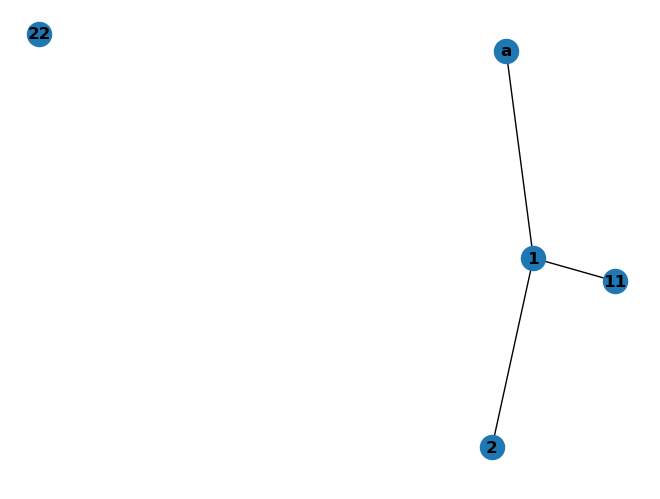

In [7]:
#그래프 그리기
print(type(g1))
nx.draw(g1, with_labels = True, font_weight = "bold")

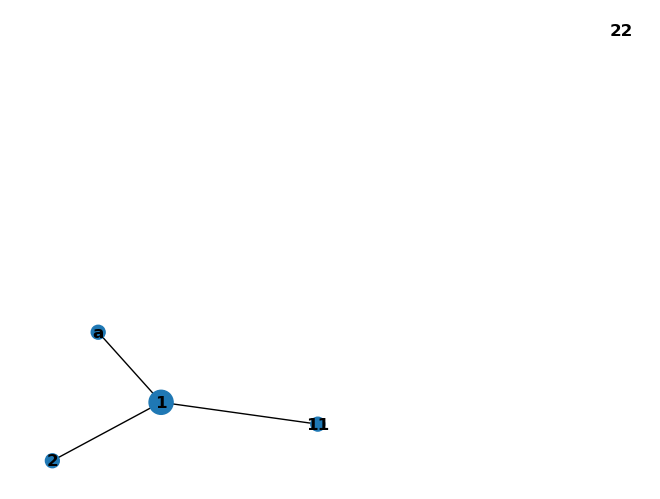

In [8]:
#degree 크기에 따른 node size 설정
d = dict(g1.degree)
nx.draw(g1, nodelist = d.keys(), node_size = [v * 100 for v in d.values()],
        with_labels = True, font_weight = "bold")

In [9]:
#노드 현황
g1.nodes

NodeView(('a', 1, 2, 11, 22))

In [10]:
#엣지 현황
g1.edges

EdgeView([('a', 1), (1, 2), (1, 11)])

In [11]:
#degree
g1.degree

DegreeView({'a': 1, 1: 3, 2: 1, 11: 1, 22: 0})

In [12]:
#인접
g1.adj

AdjacencyView({'a': {1: {}}, 1: {'a': {}, 2: {}, 11: {}}, 2: {1: {}}, 11: {1: {}}, 22: {}})

In [13]:
#노드의 개수
g1.number_of_nodes()

5

In [14]:
#엣지의 개수
g1.number_of_edges()

3

#요약 (Deprecation Warning)
print(nx.info(g1))

## 유향 그래프

In [15]:
#객체 생성b
g2 = nx.DiGraph()

g2.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

In [16]:
type(g2.nodes[1])

dict

In [17]:
g2.nodes[1]['weight'] = 500
g2.nodes[2]['weight'] = 900
g2.nodes[3]['weight'] = 700
g2.nodes[4]['weight'] = 1100

In [18]:
g2.nodes[1]

{'weight': 500}

In [19]:
g2[1]

AtlasView({2: {}, 3: {}})

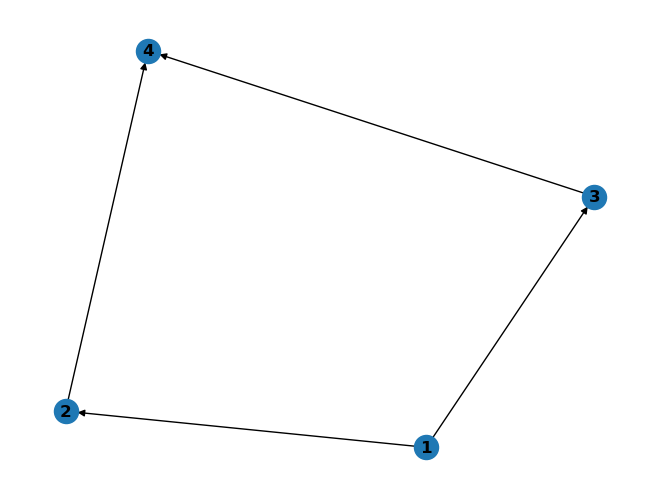

In [20]:
nx.draw(g2, with_labels = True, font_weight = "bold")

In [21]:
g2.degree

DiDegreeView({1: 2, 2: 2, 3: 2, 4: 2})

In [22]:
g2.in_degree

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [23]:
g2.out_degree


OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

# 가중치 표시

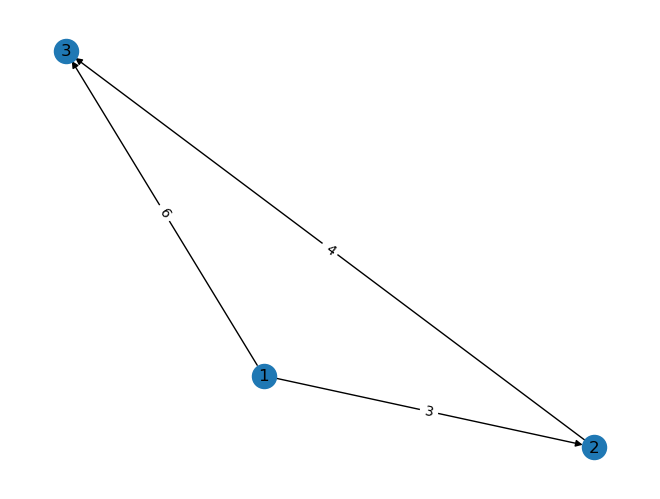

In [24]:
g3 = nx.DiGraph() 

g3.add_weighted_edges_from([(1, 2, 3), (2, 3, 4)])
g3.add_edge(1, 3, weight = 6)

pos = nx.spring_layout(g3)
nx.draw(g3, pos = pos, with_labels = True)

labels = nx.get_edge_attributes(g3,'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels = labels);

## 판다스 데이터프레임 사용 (directed graph)

In [25]:
import pandas as pd


In [26]:
df = pd.DataFrame({'from': ['A', 'B', 'C', 'A', 'E', 'D'],
                   'to': ['D', 'A', 'E', 'C', 'A', 'E'],
                   'weight': [1, 2, 3, 4, 5, 6]})
df

,from,to,weight
0,A,D,1
1,B,A,2
2,C,E,3
3,A,C,4
4,E,A,5
5,D,E,6


In [30]:
for ind, row in df.iterrows():
    print(row[0], row[1])

A D
B A
C E
A C
E A
D E


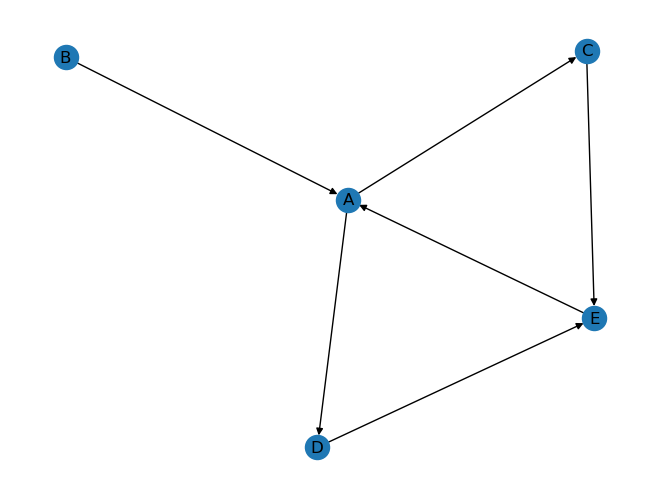

In [28]:
g = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph())
nx.draw(g, with_labels=True)

## networkx graph -> pandas dataframe

In [29]:
df = nx.to_pandas_dataframe(g, source = 'from', target = 'to')
df

AttributeError: module networkx has no attribute to_pandas_dataframe